In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set_style('white')

## Data Cleaning and Feature Selection

In [46]:
crime = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
                 )

In [47]:
#cleaning, removing header rows
crime.columns = crime.iloc[3]
crime.droprow = crime.drop(crime.index[0:4], inplace=True)

#rename columns
crime.columns = ['city','population','violent_crime','murder','rape_revised',
                 'rape_legacy','robbery','agg_assault','property_crime','burglary','larceny_theft',
                 'motor_theft','arson3']
#remove na from pop
crime.dropna(subset = ['population'], inplace=True)
#drop rape (revised def 1)
crime.drop(['rape_revised','city'],axis=1,inplace=True)

# Change the Arson null values to 0. 
crime['arson3'].fillna(0, inplace=True)

In [48]:
#remove , and conver to float (for desired columns)
crime = crime.replace(',','',regex=True)
crime.iloc[:,:] = crime.iloc[:,:].apply(lambda x: pd.to_numeric(x))
crime = crime.reset_index(drop=True)

In [49]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
population        348 non-null int64
violent_crime     348 non-null int64
murder            348 non-null int64
rape_legacy       348 non-null int64
robbery           348 non-null int64
agg_assault       348 non-null int64
property_crime    348 non-null int64
burglary          348 non-null int64
larceny_theft     348 non-null int64
motor_theft       348 non-null int64
arson3            348 non-null int64
dtypes: int64(11)
memory usage: 30.0 KB


In [50]:
crime.describe()

,population,violent_crime,murder,rape_legacy,robbery,agg_assault,property_crime,burglary,larceny_theft,motor_theft,arson3
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.005747
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,7.884612
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,0.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [51]:
from IPython.display import display
correlation_matrix = crime.corr()
display(correlation_matrix)

,population,violent_crime,murder,rape_legacy,robbery,agg_assault,property_crime,burglary,larceny_theft,motor_theft,arson3
population,1.000000,0.998854,0.986758,0.990839,0.998469,0.999134,0.996265,0.970578,0.997946,0.992421,0.023680
violent_crime,0.998854,1.000000,0.992098,0.994985,0.999923,0.999942,0.998059,0.978150,0.998762,0.996271,0.040651
murder,0.986758,0.992098,1.000000,0.997746,0.993104,0.990843,0.995403,0.993733,0.993175,0.997992,0.128936
rape_legacy,0.990839,0.994985,0.997746,1.000000,0.995438,0.994140,0.997843,0.992442,0.996260,0.998764,0.093916
robbery,0.998469,0.999923,0.993104,0.995438,1.000000,0.999742,0.998237,0.979525,0.998735,0.996927,0.046528
agg_assault,0.999134,0.999942,0.990843,0.994140,0.999742,1.000000,0.997622,0.976288,0.998561,0.995403,0.034251
property_crime,0.996265,0.998059,0.995403,0.997843,0.998237,0.997622,1.000000,0.987137,0.999666,0.998302,0.076784
burglary,0.970578,0.978150,0.993733,0.992442,0.979525,0.976288,0.987137,1.000000,0.982700,0.991464,0.174057
larceny_theft,0.997946,0.998762,0.993175,0.996260,0.998735,0.998561,0.999666,0.982700,1.000000,0.996878,0.061608
motor_theft,0.992421,0.996271,0.997992,0.998764,0.996927,0.995403,0.998302,0.991464,0.996878,1.000000,0.089692


My features have very high correlations, except for arson which i will not use. 
There is also a very high correlation between pop and my vars, and property crime, so I am going to model using property crime per capita as my out come var.

In [52]:
#create faetures
crime_feat = pd.DataFrame()
crime_feat['violent_ind'] = crime.violent_crime.where(crime.violent_crime ==0,1)
crime_feat['robbery_ind'] = crime.robbery.where(crime.robbery ==0,1)
crime_feat['murder_ind'] = crime.murder.where(crime.murder ==0,1)
crime_feat['rape_legacy'] = crime.rape_legacy.where(crime.rape_legacy ==0,1)
crime_feat['assault_ind'] = crime.agg_assault.where(crime.agg_assault ==0,1)
crime_feat['motor_ind'] = crime.motor_theft.where(crime.motor_theft ==0,1)
crime_feat['pop_sq'] =crime['population'] **2
crime_feat['sqrt_pop'] = np.sqrt(crime['population'])
# crime_feat['burglary'] = crime.burglary.where(crime.burglary==0,1)
# crime_feat['larceny_theft'] = crime.larceny_theft.where(crime.larceny_theft ==0,1)
crime_feat['burglary'] = crime['burglary']
crime_feat['larceny_theft'] = crime['larceny_theft']


In [53]:
#now scale!

# Select only numeric variables to scale.
df_num= crime_feat.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
feat_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names, index=crime.index)

C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [54]:
#make property crime ctegorical - using mean of 112.5 as cutoff
feat_scaled['property_crime_per_cap'] = crime['property_crime']/crime['population']
feat_scaled['prop_ind']= np.where(feat_scaled['property_crime_per_cap'] >= np.median(feat_scaled['property_crime_per_cap']),1,0)

In [55]:

# Independent variables
X = feat_scaled.drop(['property_crime_per_cap','prop_ind'], axis=1, inplace=False)
# Dependent variable
Y = feat_scaled['prop_ind']


## Vanilla


In [ ]:
# #pick value of C that gives best accuracy on test test
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection
# my_C = []
# my_accuracy = []
# for C in np.arange(1,2000,.1):
#     lr = LogisticRegression(C=C)
#     X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
#     fit = lr.fit(X_train, Y_train)
#     my_C.append(C)
#     my_accuracy.append(fit.score(X_test,Y_test))


# plt.plot(my_C, my_accuracy)
# plt.show()

In [ ]:
# scores = pd.DataFrame({"log_score": my_accuracy,"C":my_C})
# scores['log_score'].argmax()


In [ ]:
# scores.iloc[2698]

In [61]:
# Declare a logistic regression classifier.
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
lr = LogisticRegression(C=1e20)
# Fit the variables to the logistic model.
fit = lr.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
print('\nCoefficients: \n', fit.coef_)
print('\nIntercept: \n', fit.intercept_)

logistic_pred_y = fit.predict(X_test)
print('\n Logistic Accuracy by property crime per capita')
print(pd.crosstab(logistic_pred_y, Y_test))


print('\nThe accuracy for train set: ',format(fit.score(X_train, Y_train)))
print('The accuracy for test set: ',format(fit.score(X_test, Y_test)))


score = cross_val_score(fit, X, Y, cv=10)
print('\nEach Cross Validated R2 score: \n', score)
print("\nOverall Logistic Regression R2: %0.2f (+/- %0.2f)\n" % (score.mean(), score.std() * 2))





Coefficients: 
 [[ -1.11454833e-01   1.01500294e+00   2.58000391e-01   8.13176095e-01
    1.09151078e+00   4.68546973e-01  -1.90230491e+02  -2.08031365e+01
   -1.82767081e+01   2.28082789e+02]]

Intercept: 
 [ 2.91931738]

 Logistic Accuracy by property crime per capita
prop_ind   0   1
row_0           
0         51   6
1          7  41

The accuracy for train set:  0.8683127572016461
The accuracy for test set:  0.8761904761904762

Each Cross Validated R2 score: 
 [ 0.86111111  0.91666667  0.94444444  0.88888889  0.79411765  0.91176471
  0.88235294  0.85294118  0.82352941  0.94117647]

Overall Logistic Regression R2: 0.88 (+/- 0.09)



## Ridge logistic regression

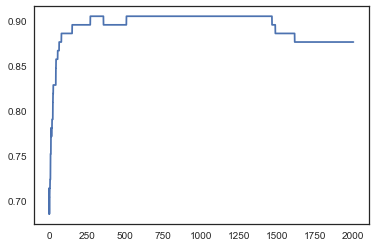

In [57]:
#find correct lambda to use 
# X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
my_alpha = []
my_accuracy = []
for lambd in np.arange(0.01,2000,.1):
    ridgeregr =LogisticRegression(penalty='l2',C=lambd)
    X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
    fit = ridgeregr.fit(X_train, Y_train)
    my_alpha.append(lambd)
    my_accuracy.append(fit.score(X_test,Y_test))


plt.plot(my_alpha, my_accuracy)
plt.show()
    


In [58]:
scores = pd.DataFrame({"ridge_score": my_accuracy,"lambda":my_alpha})
scores['ridge_score'].argmax()


2708

In [59]:
scores.iloc[2708]

lambda         270.810000
ridge_score      0.904762
Name: 2708, dtype: float64

In [60]:
# Declare a logistic regression classifier.
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
ridgeregr = LogisticRegression(penalty='l2', C=270.8)
# Fit the variables to the logistic model.
ridge_fit = ridgeregr.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
print('\nCoefficients: \n', ridge_fit.coef_)
print('\nIntercept: \n', ridge_fit.intercept_)

ridge_pred_y = ridge_fit.predict(X_test)
print('\n Ridge Accuracy by property crime per capita')
print(pd.crosstab(ridge_pred_y, Y_test))


print('\nThe accuracy for train set: ',format(ridge_fit.score(X_train, Y_train)))
print('The accuracy for test set: ',format(ridge_fit.score(X_test, Y_test)))


score = cross_val_score(ridge_fit, X, Y, cv=10)
print('\nEach Cross Validated R2 score: \n', score)
print("\nOverall Ridge Regression R2: %0.2f (+/- %0.2f)\n" % (score.mean(), score.std() * 2))


Coefficients: 
 [[ -0.13120499   0.947479     0.15172859   0.60659779   0.86058378
    0.36463447  -2.36485594 -10.44272455  15.47041288  58.92434864]]

Intercept: 
 [ 4.57711449]

 Ridge Accuracy by property crime per capita
prop_ind   0   1
row_0           
0         51   3
1          7  44

The accuracy for train set:  0.8600823045267489
The accuracy for test set:  0.9047619047619048

Each Cross Validated R2 score: 
 [ 0.80555556  0.91666667  0.83333333  0.88888889  0.82352941  0.91176471
  0.82352941  0.85294118  0.82352941  0.91176471]

Overall Ridge Regression R2: 0.86 (+/- 0.08)



The accuracies of the ridge regression is slightly less than than the vanilla, using the C value we found. 
The high C value used for the vanilla, performs very similarly to a lower C value for ridge (higher regularization). 
Does this mean that reg doesnt have much of an impact? 

## Lasso


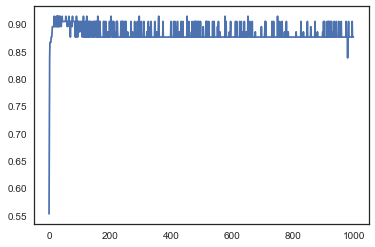

In [66]:
#find correct lambda to use 
# X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
my_alpha = []
my_accuracy = []
for lambd in np.arange(0.01,1000,1):
    lasso =LogisticRegression(penalty='l1',C=lambd)
    X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
    lasso_fit = lasso.fit(X_train, Y_train)
    my_alpha.append(lambd)
    my_accuracy.append(lasso_fit.score(X_test,Y_test))


plt.plot(my_alpha, my_accuracy)
plt.show()
    

In [67]:
scores = pd.DataFrame({"lasso_score": my_accuracy,"lambda":my_alpha})
scores['lasso_score'].argmax()


17

In [68]:
scores.iloc[17]

lambda         17.010000
lasso_score     0.914286
Name: 17, dtype: float64

In [73]:

# Independent variables
X_lass = feat_scaled.drop(['property_crime_per_cap','prop_ind'], axis=1, inplace=False)
# Dependent variable
Y_lass = feat_scaled['prop_ind']

# Declare a logistic regression classifier.
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X_lass,Y_lass, test_size=0.30, random_state=42) 
lassoregr = LogisticRegression(penalty='l1', C=17.01)
# Fit the variables to the logistic model.
lasso_fit = lassoregr.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
print('\nCoefficients: \n', lasso_fit.coef_)
print('\nIntercept: \n', lasso_fit.intercept_)

lasso_pred_y = lasso_fit.predict(X_test)
print('\n Lasso Accuracy by property crime per capita')
print(pd.crosstab(lasso_pred_y, Y_test))


print('\nThe accuracy for train set: ',format(lasso_fit.score(X_train, Y_train)))
print('The accuracy for test set: ',format(lasso_fit.score(X_test, Y_test)))


score = cross_val_score(lasso_fit, X_lass, Y_lass, cv=10)
print('\nEach Cross Validated R2 score: \n', score)
print("\nOverall Lasso Regression R2: %0.2f (+/- %0.2f)\n" % (score.mean(), score.std() * 2))


Coefficients: 
 [[ -0.09067834   0.83832173   0.17134663   0.54877907   0.79100542
    0.3404959  -17.79775038  -8.97066467   8.88599551  55.51959787]]

Intercept: 
 [ 2.97640691]

 Lasso Accuracy by property crime per capita
prop_ind   0   1
row_0           
0         50   3
1          8  44

The accuracy for train set:  0.8600823045267489
The accuracy for test set:  0.8952380952380953

Each Cross Validated R2 score: 
 [ 0.80555556  0.91666667  0.83333333  0.88888889  0.79411765  0.88235294
  0.85294118  0.85294118  0.82352941  0.82352941]

Overall Lasso Regression R2: 0.85 (+/- 0.07)



Lasso has a lower acuracy than ridge or log. It also doesnt seem that using the lambda value we found, mininmizes any of my coefificents to zero. It also seems that lasso produces more false postive results. 

@Vincent - can we discuss? 